In [51]:
import pandas as pd

us_subs = pd.read_csv("../csv/104_subs_us.csv")
us_no_trial = pd.read_csv("../csv/104_never_trialed_us_new.csv")


# Cleaning Data

In [52]:
print(us_subs.describe())
print(us_no_trial.describe())

# Drop irrgular rows
us_subs_cleaned = us_subs.drop(us_subs[us_subs['user_height'] > 200].index)
us_subs_cleaned.drop(us_subs_cleaned[us_subs_cleaned['user_height'] < 100].index, inplace=True)
us_subs_cleaned.drop(us_subs_cleaned[us_subs_cleaned['user_weight'] < 40].index, inplace=True)
us_subs_cleaned.drop(us_subs_cleaned[us_subs_cleaned['user_age'] > 90].index, inplace=True)
us_subs_cleaned.dropna(subset=['$city'], inplace=True)

us_no_trial_cleaned = us_no_trial.drop(us_no_trial[us_no_trial['user_height'] > 200].index)
us_no_trial_cleaned.drop(us_no_trial_cleaned[us_no_trial_cleaned['user_height'] < 100].index, inplace=True)
us_no_trial_cleaned.drop(us_no_trial_cleaned[us_no_trial_cleaned['user_weight'] < 40].index, inplace=True)
us_no_trial_cleaned.drop(us_no_trial_cleaned[us_no_trial_cleaned['user_age'] > 90].index, inplace=True)

us_subs_cleaned.drop(['$distinct_id', '$distinct_id.1', 'user_fitness_level', 'user_focus_areas', 'user_motivates', '$name', '$country_code'], axis=1, inplace=True)
us_no_trial_cleaned.drop(['$distinct_id', '$distinct_id.1', 'user_fitness_level', 'user_focus_areas', 'user_motivates', '$name', '$country_code'], axis=1, inplace=True)
print(us_subs_cleaned.describe())
print(us_subs_cleaned['$city'].describe())

        user_height   user_weight      user_age
count  74465.000000  74465.000000  74465.000000
mean     162.776969     76.997594     32.708225
std        7.187653     19.979862     12.202056
min       91.000000      0.000000     13.000000
25%      157.000000     63.099998     23.000000
50%      162.000000     73.099998     31.000000
75%      167.000000     87.900002     41.000000
max      213.000000    224.500000     99.000000
         user_height    user_weight       user_age
count  242129.000000  242129.000000  242129.000000
mean      161.092252      70.683244      24.847119
std         8.454592      20.110378      12.525376
min        88.000000       0.000000      12.000000
25%       157.000000      56.799999      16.000000
50%       160.000000      66.300003      20.000000
75%       167.000000      81.199997      31.000000
max       213.000000     199.899994      99.000000
        user_height   user_weight      user_age
count  70519.000000  70519.000000  70519.000000
mean     162.

# Calculate BMI and Categorizing

In [53]:
us_subs_cleaned['BMI'] = us_subs_cleaned['user_weight'] / ((us_subs_cleaned['user_height'] / 100) ** 2)
us_no_trial_cleaned['BMI'] = us_no_trial_cleaned['user_weight'] / ((us_no_trial_cleaned['user_height'] / 100) ** 2)
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
us_subs_cleaned['BMI_Category'] = pd.cut(us_subs_cleaned['BMI'], bins=bins, labels=labels, right=False)
us_no_trial_cleaned['BMI_Category'] = pd.cut(us_no_trial_cleaned['BMI'], bins=bins, labels=labels, right=False)
age_bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]
age_lables = ["<20", "20-30", "30-40", "40-50", "50-60", "60-70", "70+"]
us_subs_cleaned['age_range'] = pd.cut(us_subs_cleaned['user_age'], bins=age_bins, labels=age_lables, right=False)
us_no_trial_cleaned['age_range'] = pd.cut(us_no_trial_cleaned['user_age'], bins=age_bins, labels=age_lables, right=False)

In [54]:
us_subs_cleaned['BMI_Category'] = us_subs_cleaned['BMI_Category'].astype('str')
us_subs_cleaned['age_range'] = us_subs_cleaned['age_range'].astype('str')

us_no_trial_cleaned['BMI_Category'] = us_no_trial_cleaned['BMI_Category'].astype('str')
us_no_trial_cleaned['age_range'] = us_no_trial_cleaned['age_range'].astype('str')

us_subs_cleaned['Category_wo_city'] = us_subs_cleaned['BMI_Category'] + '_' + us_subs_cleaned['age_range']
us_no_trial_cleaned['Category_wo_city'] = us_no_trial_cleaned['BMI_Category'] + '_' + us_no_trial_cleaned['age_range']

In [55]:
print("us_subs_cleaned['Category_wo_city'].value_counts()")
print("=======================================")
print(us_subs_cleaned['Category_wo_city'].value_counts().head(10))
print("us_no_trial_cleaned['Category_wo_city'].value_counts()")
print("=======================================")
print(us_no_trial_cleaned['Category_wo_city'].value_counts().head(10))

us_subs_cleaned['Category_wo_city'].value_counts()
Category_wo_city
Obese_20-30            9098
Obese_30-40            7841
Normal weight_20-30    7029
Overweight_20-30       6624
Overweight_30-40       5710
Normal weight_30-40    5076
Obese_40-50            4709
Overweight_40-50       3929
Normal weight_<20      3903
Normal weight_40-50    3231
Name: count, dtype: int64
us_no_trial_cleaned['Category_wo_city'].value_counts()
Category_wo_city
Normal weight_<20      53168
Overweight_<20         25687
Normal weight_20-30    23060
Obese_20-30            21411
Obese_<20              21085
Overweight_20-30       18743
Obese_30-40            12503
Overweight_30-40        9233
Normal weight_30-40     8333
Underweight_<20         7593
Name: count, dtype: int64


count    70519.000000
mean        32.794495
std         12.197682
min         13.000000
25%         23.000000
50%         31.000000
75%         41.000000
max         89.000000
Name: user_age, dtype: float64


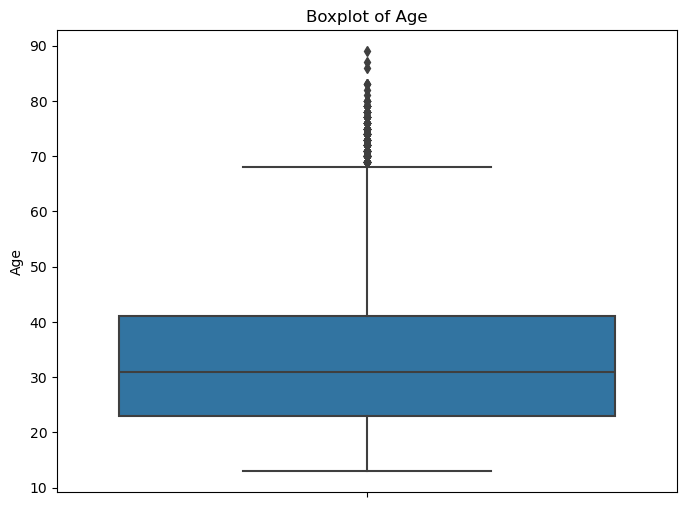

count    237536.000000
mean         25.011927
std          12.508077
min          12.000000
25%          16.000000
50%          20.000000
75%          31.000000
max          88.000000
Name: user_age, dtype: float64


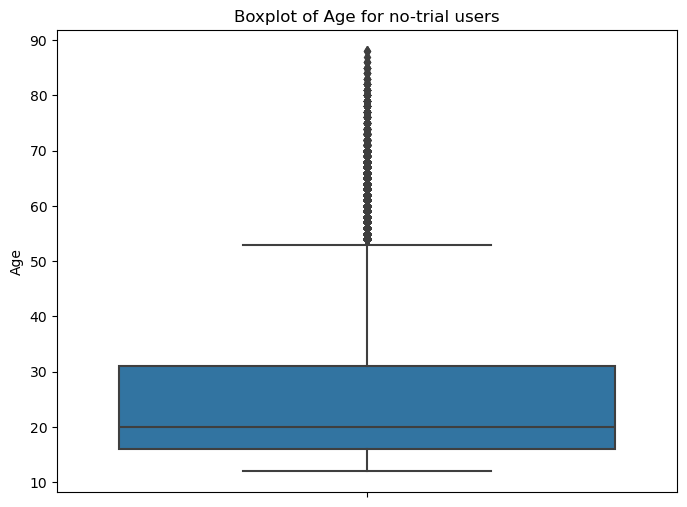

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
print(us_subs_cleaned['user_age'].describe())
# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=us_subs_cleaned['user_age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

print(us_no_trial_cleaned['user_age'].describe())
# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=us_no_trial_cleaned['user_age'])
plt.title('Boxplot of Age for no-trial users')
plt.ylabel('Age')
plt.show()

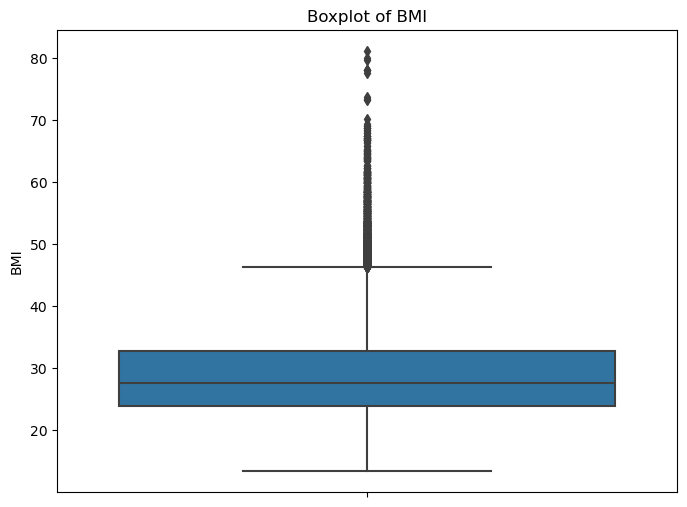

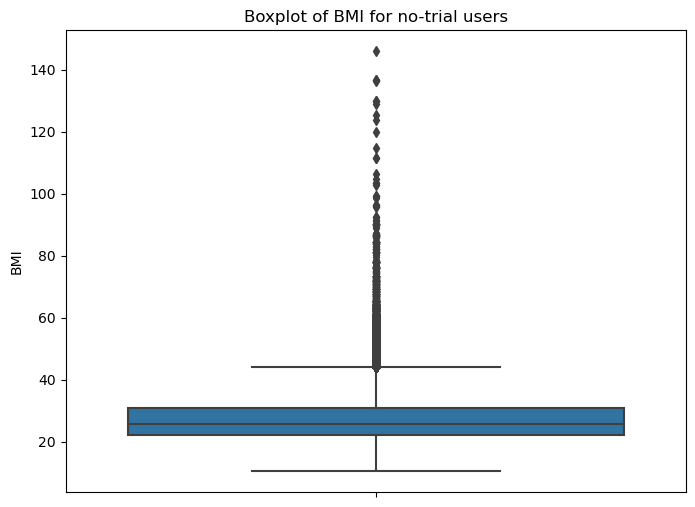

In [57]:
# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=us_subs_cleaned['BMI'])
plt.title('Boxplot of BMI')
plt.ylabel('BMI')
plt.show()

# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=us_no_trial_cleaned['BMI'])
plt.title('Boxplot of BMI for no-trial users')
plt.ylabel('BMI')
plt.show()

In [58]:
print(us_subs_cleaned['$city'].value_counts().head(20))

$city
Chicago         1155
Dallas           995
Atlanta          911
Houston          892
Los Angeles      880
New York         793
Philadelphia     720
Brooklyn         691
San Antonio      666
Charlotte        649
Miami            583
Phoenix          569
Denver           552
Minneapolis      540
Las Vegas        532
Seattle          506
Sacramento       442
Orlando          418
Washington       412
Columbus         407
Name: count, dtype: int64


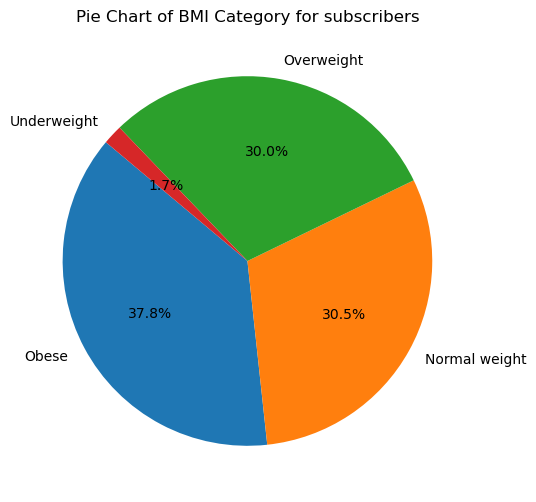

In [59]:

# Setting the color palette using Seaborn
colors = plt.get_cmap('viridis')

subs_bmi = us_subs_cleaned['BMI_Category'].value_counts()
# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(subs_bmi, labels=subs_bmi.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of BMI Category for subscribers')
plt.show()

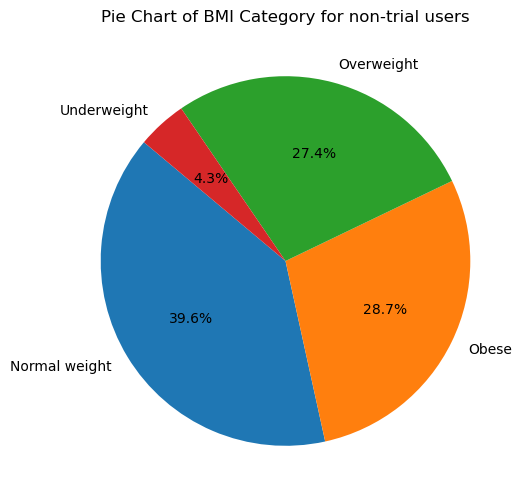

In [60]:
# Setting the color palette using Seaborn
colors = plt.get_cmap('viridis')

subs_bmi = us_no_trial_cleaned['BMI_Category'].value_counts()
# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(subs_bmi, labels=subs_bmi.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of BMI Category for non-trial users')
plt.show()

In [61]:
# Load city coordinates data
df_cities = pd.read_csv('../csv/uscities_full.csv')
print(df_cities.head())

          city   city_ascii city_alt state_id  state_name  county_fips  \
0     New York     New York      NaN       NY    New York        36081   
1  Los Angeles  Los Angeles      NaN       CA  California         6037   
2      Chicago      Chicago      NaN       IL    Illinois        17031   
3        Miami        Miami      NaN       FL     Florida        12086   
4      Houston      Houston      NaN       TX       Texas        48201   

   county_name                county_fips_all  \
0       Queens  36081|36047|36085|36005|36061   
1  Los Angeles                          06037   
2         Cook                    17031|17043   
3   Miami-Dade                          12086   
4       Harris              48201|48157|48339   

                        county_name_all      lat  ...  poverty  \
0  Queens|Kings|Richmond|Bronx|New York  40.6943  ...     17.2   
1                           Los Angeles  34.1141  ...     16.6   
2                           Cook|DuPage  41.8375  ...     16.9

/var/folders/74/1dgwmtps40x3y64v1glfxmfr0000gn/T/ipykernel_61217/757271939.py:2: DtypeWarning: Columns (2,7,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cities = pd.read_csv('../csv/uscities_full.csv')


In [62]:
# Merge user data with city coordinates
df_merged = pd.merge(us_subs_cleaned, df_cities, left_on=['$city', '$region'], right_on=['city', 'state_name'])
df_merged_no_trial = pd.merge(us_no_trial_cleaned, df_cities, left_on=['$city', '$region'], right_on=['city', 'state_name'])


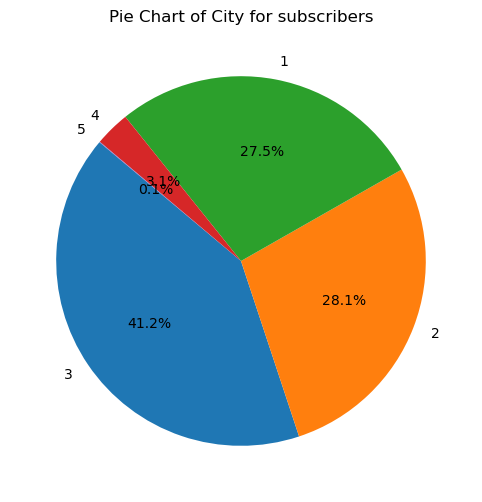

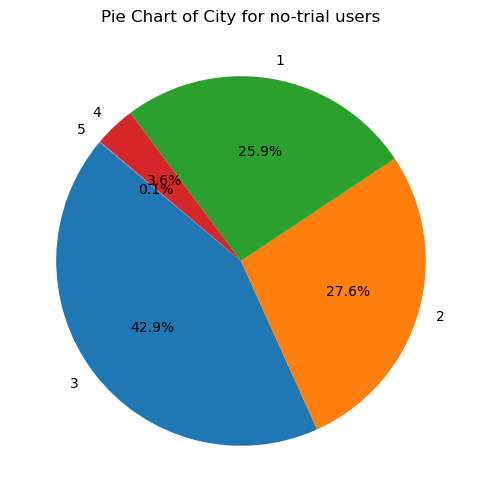

In [63]:
# Setting the color palette using Seaborn
colors = plt.get_cmap('viridis')

subs_city = df_merged['ranking'].value_counts()
no_trial_city = df_merged_no_trial['ranking'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(subs_city, labels=subs_city.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of City for subscribers')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(no_trial_city, labels=no_trial_city.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of City for no-trial users')
plt.show()


In [64]:
# Count the number of users per city
city_counts = df_merged.groupby(['$city', '$region']).size().reset_index(name='Count')
city_counts = pd.merge(city_counts, df_cities, left_on=['$city', '$region'], right_on=['city', 'state_name'])
print(city_counts)

city_counts_no_trial = df_merged_no_trial.groupby(['$city', '$region']).size().reset_index(name='Count')
city_counts_no_trial = pd.merge(city_counts_no_trial, df_cities, left_on=['$city', '$region'], right_on=['city', 'state_name'])
print(city_counts_no_trial)

            $city         $region  Count         city   city_ascii city_alt  \
0       Abbeville       Louisiana      2    Abbeville    Abbeville      NaN   
1       Abbeville  South Carolina      2    Abbeville    Abbeville      NaN   
2        Aberdeen        Maryland      6     Aberdeen     Aberdeen      NaN   
3        Aberdeen  North Carolina      3     Aberdeen     Aberdeen      NaN   
4        Aberdeen    South Dakota      8     Aberdeen     Aberdeen      NaN   
...           ...             ...    ...          ...          ...      ...   
8249  Zephyrhills         Florida      8  Zephyrhills  Zephyrhills      NaN   
8250    Zimmerman       Minnesota      3    Zimmerman    Zimmerman      NaN   
8251         Zion        Illinois     10         Zion         Zion      NaN   
8252   Zionsville         Indiana      9   Zionsville   Zionsville      NaN   
8253     Zirconia  North Carolina      1     Zirconia     Zirconia      NaN   

     state_id      state_name  county_fips county_n

In [65]:
import folium
import branca.colormap as cm

# Create a map centered around the US
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a colormap
colormap = cm.linear.YlOrRd_09.scale(city_counts['Count'].min(), city_counts['Count'].max())
colormap = colormap.to_step(n=5)

# Add city markers to the map
for _, row in city_counts.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=1,  # Scale the radius based on the count
        popup=f"{row['$city']}, {row['$region']} ({row['Count']})",
        color=colormap(row['Count']),
        fill=True,
        fill_color=colormap(row['Count']),
        fill_opacity=0.6
    ).add_to(map)

# Save the map to an HTML file
map.save("us_cities_map.html")


# Create a colormap
colormap = cm.linear.YlOrRd_09.scale(city_counts_no_trial['Count'].min(), city_counts_no_trial['Count'].max())
colormap = colormap.to_step(n=5)

for _, row in city_counts_no_trial.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=1,  # Scale the radius based on the count
        popup=f"{row['$city']}, {row['$region']} ({row['Count']})",
        color=colormap(row['Count']),
        fill=True,
        fill_color=colormap(row['Count']),
        fill_opacity=0.6
    ).add_to(map)
map.save("us_cities_map_no_trial.html")

In [66]:
df_merged['ranking'] = df_merged['ranking'].astype('str')
df_merged_no_trial['ranking'] = df_merged_no_trial['ranking'].astype('str')
df_merged['Category'] = df_merged['BMI_Category'] + '_' + df_merged['age_range'] + '_' + df_merged['ranking']
df_merged_no_trial['Category'] = df_merged_no_trial['BMI_Category'] + '_' + df_merged_no_trial['age_range'] + '_' + df_merged_no_trial['ranking']

In [67]:
print("df_merged['Category'].value_counts()")
print("=======================================")
print(df_merged['Category'].value_counts().head(20))
print("df_merged_no_trial['Category'].value_counts()")
print("=======================================")
print(df_merged_no_trial['Category'].value_counts().head(20))

df_merged['Category'].value_counts()
Category
Obese_20-30_3            3541
Obese_30-40_3            3129
Obese_20-30_2            2597
Normal weight_20-30_3    2554
Obese_20-30_1            2545
Overweight_20-30_3       2405
Overweight_30-40_3       2245
Obese_30-40_2            2224
Normal weight_20-30_1    2157
Obese_30-40_1            2087
Obese_40-50_3            2072
Normal weight_20-30_2    1996
Overweight_20-30_1       1966
Normal weight_30-40_3    1943
Overweight_20-30_2       1914
Overweight_40-50_3       1726
Overweight_30-40_1       1598
Overweight_30-40_2       1596
Normal weight_<20_3      1546
Normal weight_30-40_1    1440
Name: count, dtype: int64
df_merged_no_trial['Category'].value_counts()
Category
Normal weight_<20_3      22837
Normal weight_<20_2      13102
Normal weight_<20_1      12066
Overweight_<20_3         10407
Obese_<20_3               8488
Normal weight_20-30_3     8318
Obese_20-30_3             8129
Overweight_<20_2          6701
Overweight_20-30_3       

In [68]:
print(df_cities.columns)

Index(['city', 'city_ascii', 'city_alt', 'state_id', 'state_name',
       'county_fips', 'county_name', 'county_fips_all', 'county_name_all',
       'lat', 'lng', 'population', 'population_proper', 'density', 'source',
       'military', 'incorporated', 'cdp', 'township', 'timezone', 'ranking',
       'zips', 'id', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'age_over_65', 'age_18_to_24', 'age_over_18', 'male', 'female',
       'married', 'divorced', 'never_married', 'widowed', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_househol

In [73]:
print(df_merged['income_individual_median'].dropna().describe())
print(df_merged_no_trial['income_individual_median'].dropna().describe())

from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(df_merged['income_individual_median'].dropna(), df_merged_no_trial['income_individual_median'].dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

count     66468.000000
mean      39213.257598
std       11858.590307
min        4192.000000
25%       31944.000000
50%       37051.500000
75%       44462.000000
max      171969.000000
Name: income_individual_median, dtype: float64
count    214161.000000
mean      38139.491187
std       11454.598771
min        2499.000000
25%       30841.000000
50%       35963.000000
75%       42686.000000
max      171969.000000
Name: income_individual_median, dtype: float64
T-statistic: 20.935306850419824
P-value: 3.032697660182181e-97


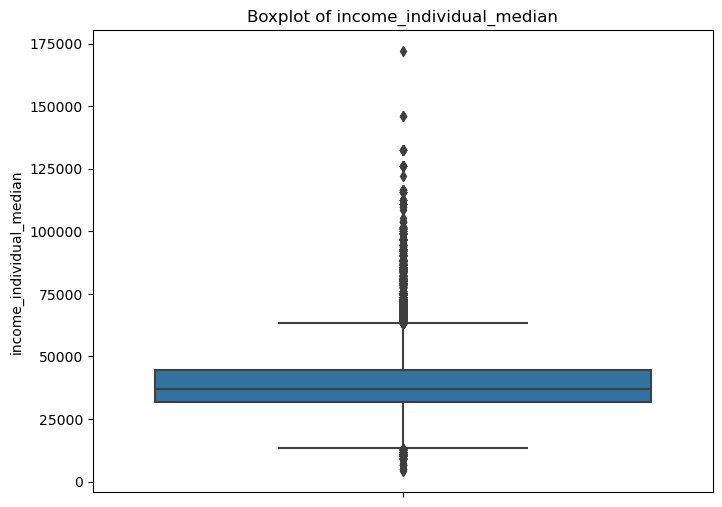

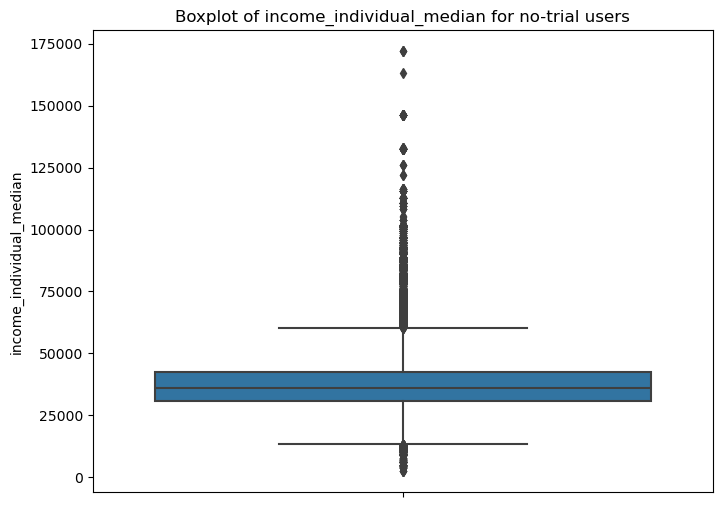

In [71]:
# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_merged['income_individual_median'].dropna())
plt.title('Boxplot of income_individual_median')
plt.ylabel('income_individual_median')
plt.show()

# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_merged_no_trial['income_individual_median'].dropna())
plt.title('Boxplot of income_individual_median for no-trial users')
plt.ylabel('income_individual_median')
plt.show()

In [72]:
print(df_merged['income_household_median'].dropna().describe())
print(df_merged_no_trial['income_household_median'].dropna().describe())

# Perform t-test
t_stat, p_value = ttest_ind(df_merged['income_household_median'].dropna(), df_merged_no_trial['income_household_median'].dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

count     66378.000000
mean      76336.434195
std       28441.979365
min       14250.000000
25%       57943.000000
50%       71673.000000
75%       87544.000000
max      250001.000000
Name: income_household_median, dtype: float64
count    213868.000000
mean      74094.285924
std       27778.278961
min        2499.000000
25%       56266.000000
50%       67846.000000
75%       85700.000000
max      250001.000000
Name: income_household_median, dtype: float64
T-statistic: 18.06347582742538
P-value: 6.799775154686082e-73


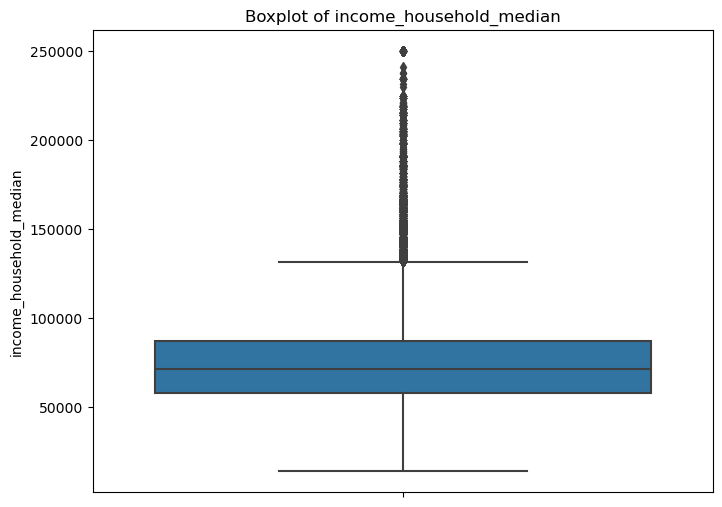

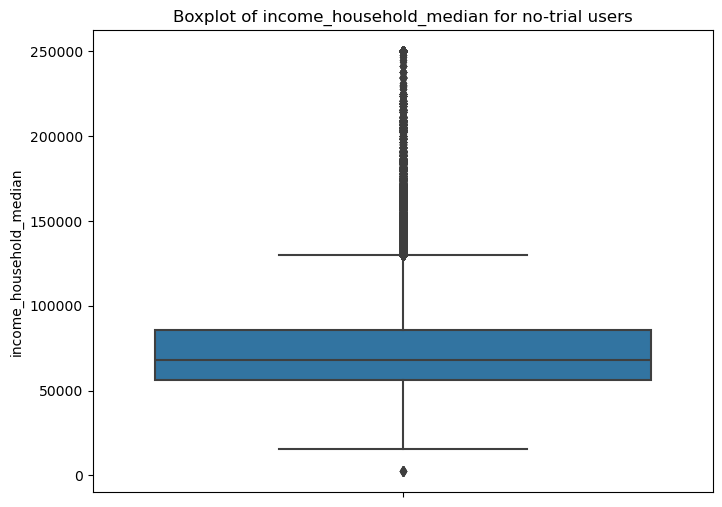

In [74]:
# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_merged['income_household_median'].dropna())
plt.title('Boxplot of income_household_median')
plt.ylabel('income_household_median')
plt.show()

# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_merged_no_trial['income_household_median'].dropna())
plt.title('Boxplot of income_household_median for no-trial users')
plt.ylabel('income_household_median')
plt.show()